'\nInterpretation of results:\n- Based on the explained variance ratio plot, determine the number of significant components.\n- Analyze the loadings matrix to understand which original features contribute most to each significant component.\n- Interpret the contribution values:\n  - High positive values indicate strong positive correlation with the component.\n  - High negative values indicate strong negative correlation with the component.\n  - Values close to 0 indicate weak or no correlation.\n\nGeneral Observations:\n\nEach component captures a different combination of features with varying strengths (represented by absolute loading values).\nA high positive loading (> 0.5) indicates a strong positive correlation between the feature and the component.\nA high negative loading (< -0.5) indicates a strong negative correlation.\nValues close to 0 suggest a weak or no correlation.\nComponent-wise Analysis:\n\nComponent 1:\n\nSeems to be influenced by ask price features, with all loadin

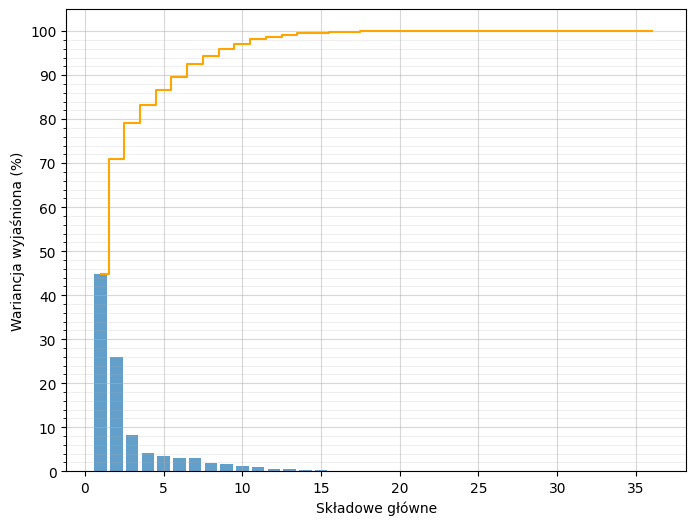

In [94]:
import utilities
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data_path = utilities.get_data_path(tree_level=2)
PRODUCT = "btc"
filename = os.path.join(data_path, "datasets", f"{PRODUCT}_times_transformed.csv")

# TODO: REMOVE LIMIT LATER!
df = pd.read_csv(filename, index_col='time')

# # Choose features for analysis
features = list(df.columns) 

# Standardize features before applying PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# Perform PCA analysis
pca = PCA(n_components=len(features))  # Analyze all components
pca_data = pca.fit_transform(scaled_data)

# Explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

# Plot explained variance ratio
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(range(1, len(features) + 1),
        explained_variance * 100,
        alpha=0.7, 
        label='Individual Explained Variance')

ax.step(range(1, len(features) + 1),
         np.cumsum(explained_variance) * 100,
         where='mid',
        #  marker='o', 
        #  linestyle='-',
         color='orange',
         label='Cumulative Explained Variance')

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 101, 10)
minor_ticks = np.arange(0, 101, 2)

# ax.set_xticks(major_ticks)
# ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
plt.xlabel("Składowe główne")
plt.ylabel("Wariancja wyjaśniona (%)")
# plt.title("Explained Variance Ratio")

# plt.show()

# # Analyze loadings (contribution of original features to each component)
# loadings = pca.components_

# # Print the contribution of each feature to the first 6 components
# for i in range(6):
#     print(f"\nComponent {i+1}:")
#     for j, feature in enumerate(features):
#         print(f"{feature}: {loadings[i][j]:.4f}")

"""
Interpretation of results:
- Based on the explained variance ratio plot, determine the number of significant components.
- Analyze the loadings matrix to understand which original features contribute most to each significant component.
- Interpret the contribution values:
  - High positive values indicate strong positive correlation with the component.
  - High negative values indicate strong negative correlation with the component.
  - Values close to 0 indicate weak or no correlation.

General Observations:

Each component captures a different combination of features with varying strengths (represented by absolute loading values).
A high positive loading (> 0.5) indicates a strong positive correlation between the feature and the component.
A high negative loading (< -0.5) indicates a strong negative correlation.
Values close to 0 suggest a weak or no correlation.
Component-wise Analysis:

Component 1:

Seems to be influenced by ask price features, with all loadings positive and relatively high (> 0.18).
This suggests Component 1 captures data related to the asking price distribution.
Component 2:

Primarily driven by bid price features, with all loadings negative and mostly high in absolute value (> 0.3).
This component likely captures information about the bidding price distribution.
Component 3:

Shows mixed contributions from bid and ask price features, with some positive and negative loadings of varying strengths.
This component might be related to price differences or spreads between bids and asks.
Component 4:

Similar to Component 2, but with slightly lower loading values, suggesting a focus on bidding activity.
Component 5:

Has relatively low loading values for most features, except for spread_min with a very high negative value (-0.75).
This component might be related to extreme price differences or outliers.
Component 6:

Shows weak contributions from most features, with only ask_vol_price_q3 and spread_min having slightly higher positive loadings.
This component might be capturing some specific relationships between asking volume and minimum spread.
"""

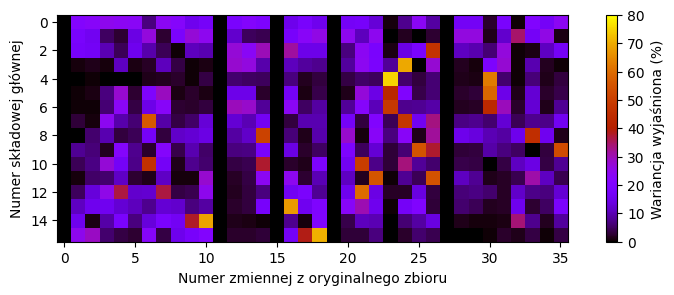

In [95]:
# Analyze loadings (contribution of original features to each component)
loadings = pca.components_


# Print the contribution of each feature to the first 6 components
# for i in range(6):
#     print(f"\nComponent {i+1}:")
#     for j, feature in enumerate(features):
#         print(f"{feature}: {loadings[i][j]:.4f}")

fig, ax = plt.subplots(figsize=(8, 3))

plt.imshow(100 * np.abs(loadings[:16]), cmap='gnuplot', vmin=0, vmax=80)
plt.xlabel("Numer zmiennej z oryginalnego zbioru")
plt.ylabel("Numer składowej głównej")

# Or if you want different settings for the grids:
# ax.grid(which='minor', alpha=0.2)
# ax.grid(which='major', alpha=0.5)
plt.tight_layout()
ax.set_yticks(np.arange(0, 15, 2))
cbar = plt.colorbar()
cbar.ax.set_ylabel("Wariancja wyjaśniona (%)")

plt.savefig(os.path.join(data_path, "..", "graphics", f"{PRODUCT}_explained_variance_first15.pdf"))


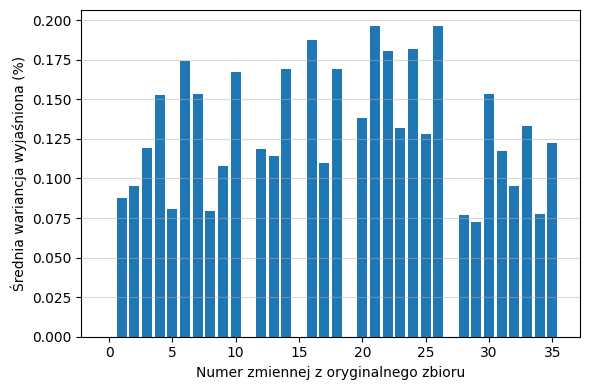

In [96]:
total = np.sum(np.abs(loadings[:16]), axis=0) / 15

fig, ax = plt.subplots(figsize=(6,4))
ax.grid(which='major', axis='y', alpha=.5)

ax.bar(range(len(loadings[0])), total)
plt.xlabel("Numer zmiennej z oryginalnego zbioru")
plt.ylabel("Średnia wariancja wyjaśniona (%)")

# Or if you want different settings for the grids:
# ax.grid(which='minor', alpha=0.2)
# ax.grid(which='major', alpha=0.5)
plt.tight_layout()
# plt.show()
plt.savefig(os.path.join(data_path, "..", "graphics", f"{PRODUCT}_mean_explained_variance_first15.pdf"))